## The Data

### Heart Disease: Prediction And Classification

Data Source and Feature Codebook: https://www.cdc.gov/brfss/annual_data/annual_2019.html

The Behavioral Risk Factor Surviellance System (BRFSS) is a project conducted by the Centre for Disease Control and Prevention (CDC) in all states in the United States. This dataset is done via survey over the phone, and collects data on health risk behaviours, chronic diseaes and conditions, access to healthcare and much more. The raw dataset was cleaned and only 18 attributes that would be relevant to heart disease prediction and classification were selected, such as specific demographics, health indicators, risk factors, and general health and wellness. The target variable in this analysis is 'HeartDisease' and is a yes or no attribute declaring if the individual has ever had coronary heart disease (CHD) or a myocardial infarction (MI) before. 

According to the CDC, important risk factors for heart disease are high blood pressure, high cholesterol, diabetes, smoking, obesity, unhealthy diet, and physical inactivity. From the 343 variables in the dataset, the health indicators in this dataset were chosen from this information. The cleaned dataset can be found on the github page. 

Source: https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.
 

Attribute Information:

1. HeartDisease: Reported having coronary heart disease (CHD) or myocardial infarction (MI) --- 1=yes, 0=no [TARGET VARIABLE]
2. Age: Thirteen-level age category --- 1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80+
3. Sex: Sex of Respondent --- 1=male, 0=female
4. Education: Highest grade or year of school completed --- 1=no school, 2=elementary, 3=some highschool, 4=highschool grad, 5=some college, 6=college grad
5. Income: Annual Household Income --- 1=<10k, 2=10-15k, 3=15-20k, 4=20-25k, 5=25-35k, 6=35-50k, 7=50-75k, 8=75k+
5. HighChol: Cholesterol checked and told by doctor, nurse, or other health professional that it was high --- 1=yes, 0=no
6. HighBP: Told high blood pressure by a doctor, nurse, or other health professional --- 1=yes, 0=no
7. BMI: Body Mass Index (BMI) --- BMI rounded to nearest integer
8. HeavyAlcoholConsump: Heavy drinkers (drinks per week 14+ for men, 7+ for women) --- 1=yes, 0=no
9. Smoker: Current smokers --- 1=yes, 0=no
10. Stroke: Ever had a stroke --- 1=yes, 0=no
11. Diabetes: Have diabetes --- 0=no, 1=prediabetes/borderline, 2=yes
12. PhysicalActivtiy: Physical activity or exercise during the past 30 days other than their regular job --- 1=yes, 0=no
13. Vegetables: Vegetables one or more times a day --- 1=yes, 0=no
14. Fruits: Fruits one or more times a day --- 1=yes, 0=no
15. GenHealth: General health status --- 1=excellent, 2=very good, 3=good, 4=fair, 5=poor
16. MenHealth: Days per month mental health was not good --- how many days per month
17. PhyHealth: Days per month physical health was not good --- how many days per month

### Goal

General goal is to not only create a machine learning algorithm that is effective at predicting and classifying heart disease, but to compare the effectiveness of these various machine learning algorithms with each other. Additionally, a general guideline for researchers and surveyors to see which features and survey questions are more likely to be important in the prediction of heart disease compared to others (e.g., what features to look out for in patients).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_disease = pd.read_csv('heart_disease_brfss2019.csv')

In [3]:
heart_disease.head()

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
0,0.0,13,0,3.0,3.0,1.0,1,28.0,0,0,0.0,0.0,0,1,1,3.0,0.0,15.0
1,0.0,11,0,5.0,5.0,0.0,0,19.0,0,0,0.0,0.0,1,1,1,4.0,0.0,10.0
2,0.0,10,0,6.0,7.0,0.0,1,32.0,0,0,0.0,2.0,1,1,1,3.0,30.0,0.0
3,0.0,11,1,6.0,7.0,0.0,0,33.0,0,1,0.0,2.0,1,1,1,2.0,0.0,30.0
4,0.0,11,0,2.0,3.0,1.0,0,17.0,0,0,0.0,2.0,0,0,0,5.0,0.0,20.0


In [56]:
heart_disease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,256203.0,0.090022,0.286214,0.0,0.0,0.0,0.0,1.0
Age,256203.0,7.801142,3.362842,1.0,5.0,8.0,10.0,13.0
Sex,256203.0,0.471372,0.499181,0.0,0.0,0.0,1.0,1.0
Education,256203.0,5.061970,0.976722,1.0,4.0,5.0,6.0,6.0
Income,256203.0,6.104175,2.073575,1.0,5.0,7.0,8.0,8.0
HighChol,256203.0,0.374430,0.483976,0.0,0.0,0.0,1.0,1.0
HighBP,256203.0,0.415791,0.492859,0.0,0.0,0.0,1.0,1.0
BMI,256203.0,28.584294,6.412447,12.0,24.0,27.0,32.0,99.0
HeavyAlcoholConsump,256203.0,0.063660,0.244148,0.0,0.0,0.0,0.0,1.0
Smoker,256203.0,0.135182,0.341918,0.0,0.0,0.0,0.0,1.0


#### Univariate Analysis: Distributions

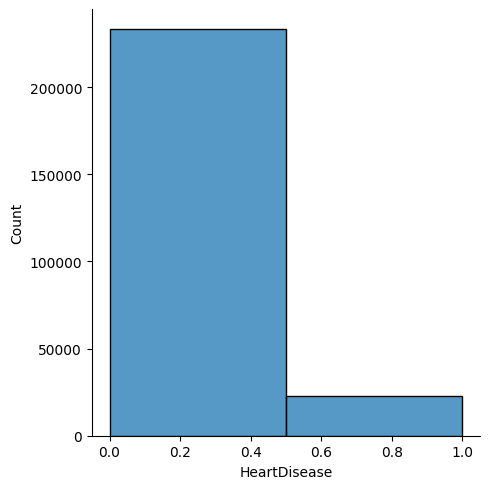

In [19]:
sns.displot(data=heart_disease, x='HeartDisease', bins=2);
#note class imbalance

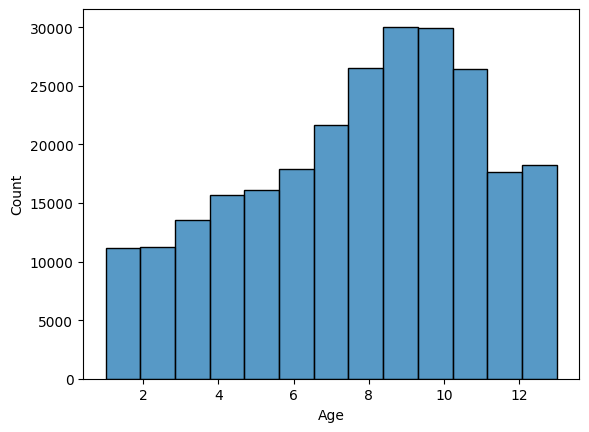

In [53]:
#age
sns.histplot(data=heart_disease, x='Age', bins=13);

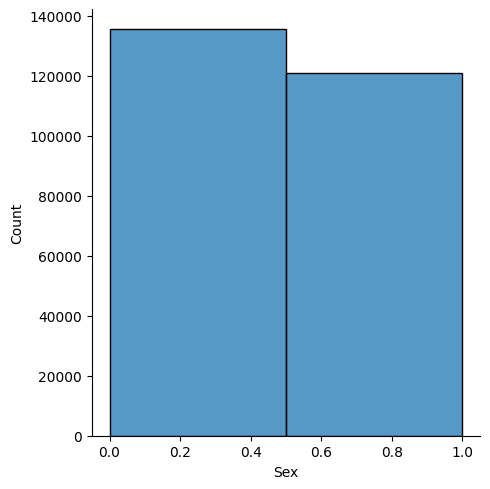

In [55]:
sns.displot(data=heart_disease, x='Sex', bins=2);
#relatively even

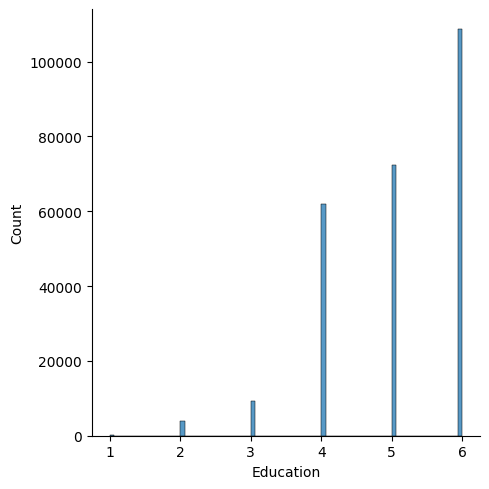

In [22]:
sns.displot(data=heart_disease, x='Education');
#mostly college or high school graduates

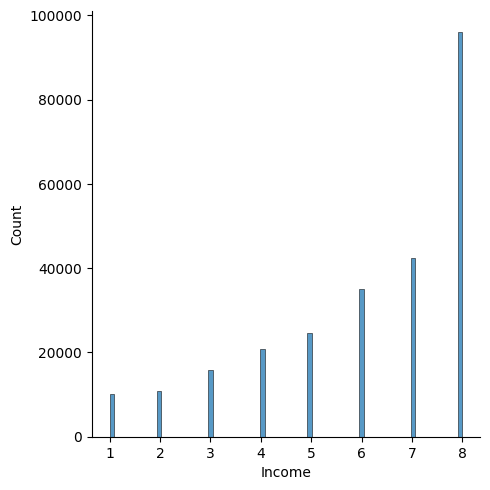

In [24]:
sns.displot(data=heart_disease, x='Income');
#most earn more than 75k per household

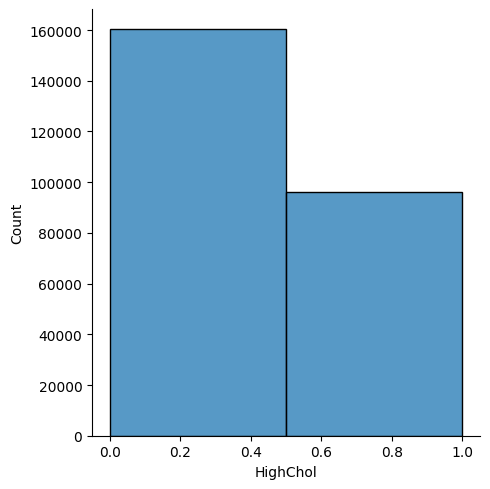

In [25]:
sns.displot(data=heart_disease, x='HighChol', bins=2);

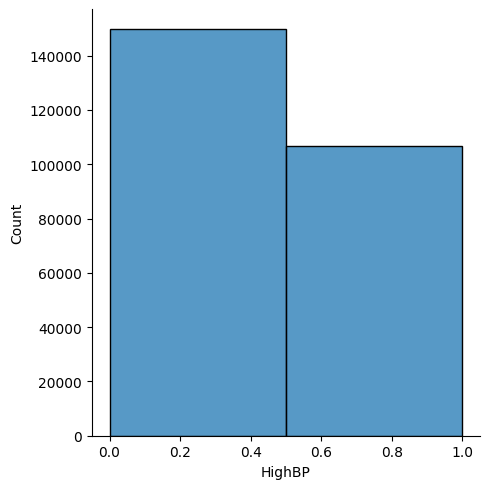

In [26]:
sns.displot(data=heart_disease, x='HighBP', bins=2);
#very similar to cholesetrol

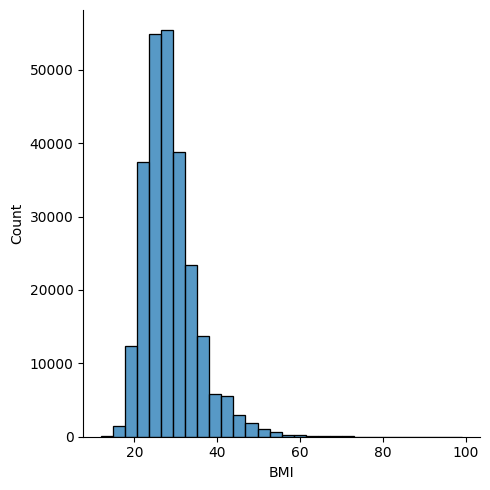

In [33]:
sns.displot(data=heart_disease, x='BMI', bins=30);

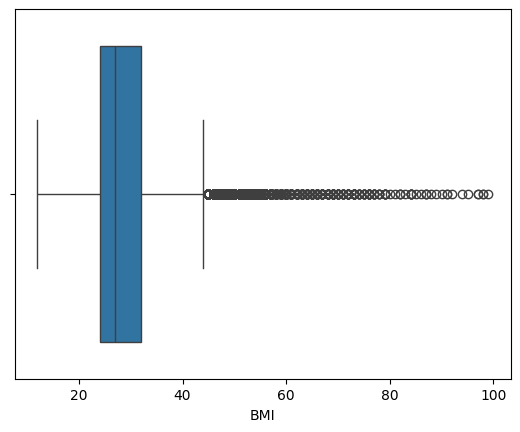

In [34]:
sns.boxplot(data=heart_disease, x='BMI');
#outliers in the BMI variable, over 3000

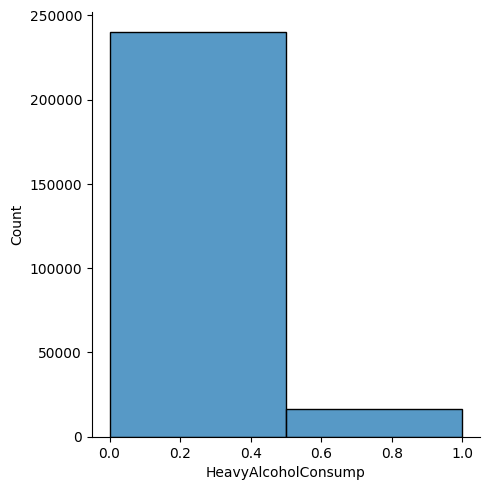

In [38]:
sns.displot(data=heart_disease, x='HeavyAlcoholConsump', bins=2);

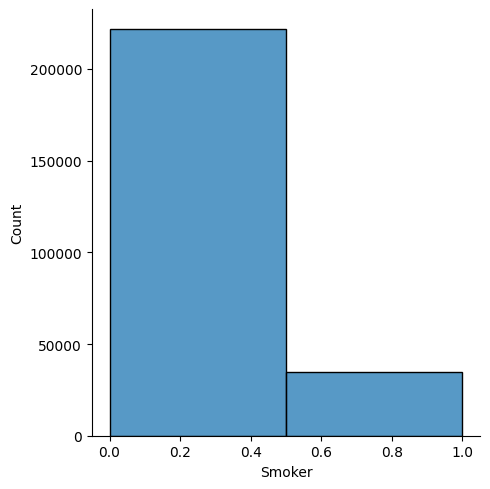

In [40]:
sns.displot(data=heart_disease, x='Smoker', bins=2);

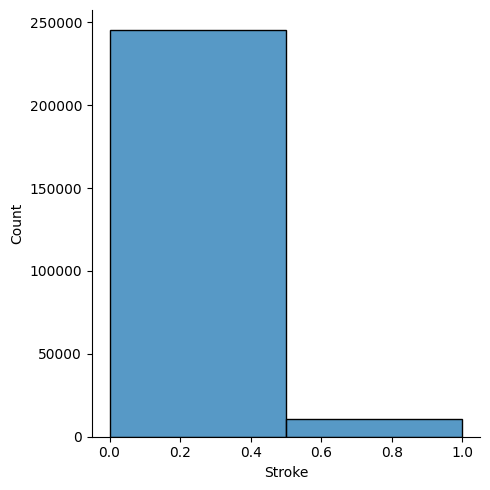

In [41]:
sns.displot(data=heart_disease, x='Stroke', bins=2);

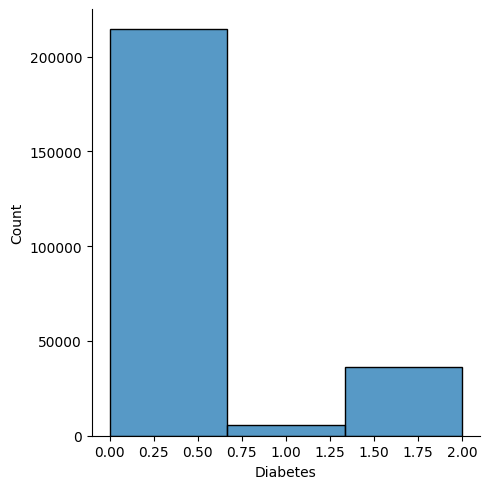

In [42]:
sns.displot(data=heart_disease, x='Diabetes', bins=3);
#mostly non-diabets, very few borderline or pre diabetes

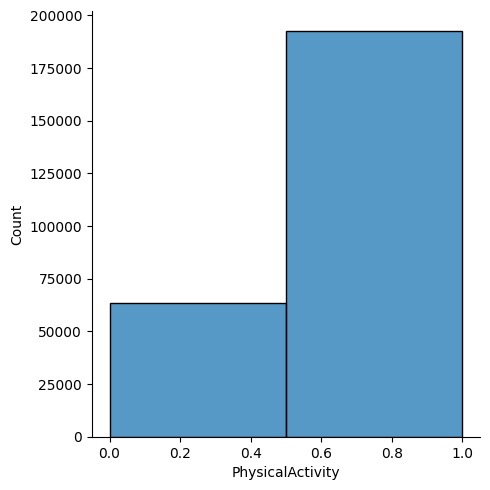

In [44]:
sns.displot(data=heart_disease, x='PhysicalActivity', bins=2);
#most respondents somewhat active

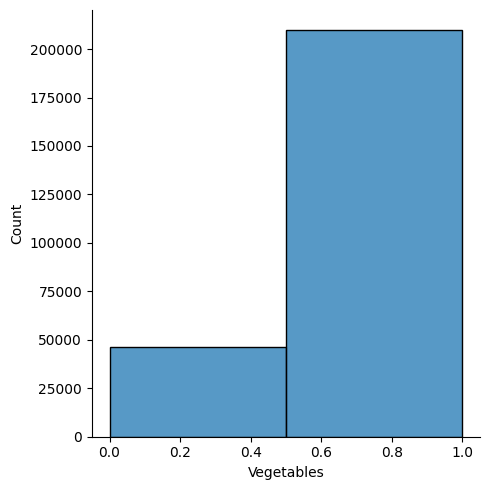

In [45]:
sns.displot(data=heart_disease, x='Vegetables', bins=2);
#most respondents eat vegetables

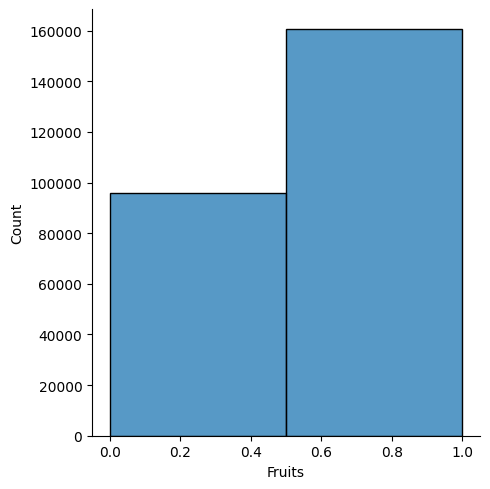

In [46]:
sns.displot(data=heart_disease, x='Fruits', bins=2);
#not as many respondents eat fruits as vegetables

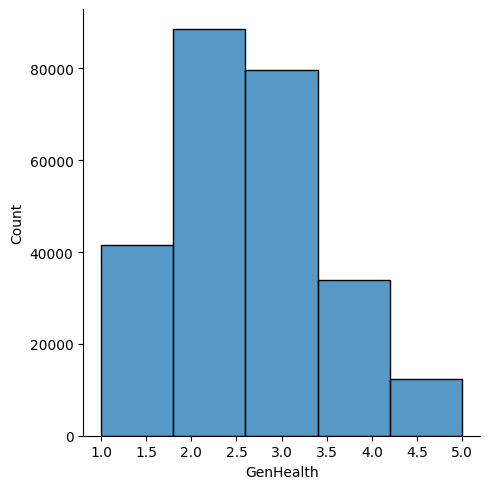

In [50]:
sns.displot(data=heart_disease, x='GenHealth', bins=5);

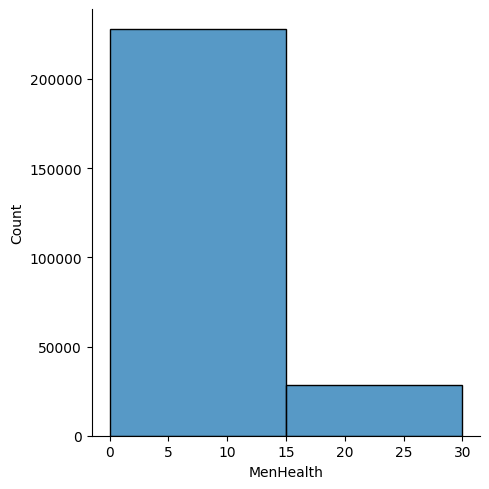

In [51]:
sns.displot(data=heart_disease, x='MenHealth', bins=2);


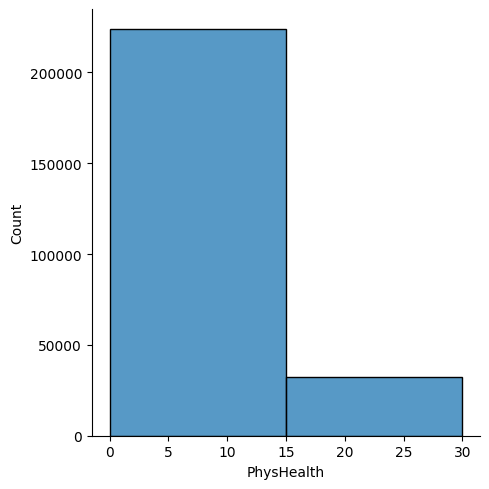

In [52]:
sns.displot(data=heart_disease, x='PhysHealth', bins=2);

#### Correlation Between Non-Target Variables

In [6]:
data = heart_disease.drop('HeartDisease', axis=1)

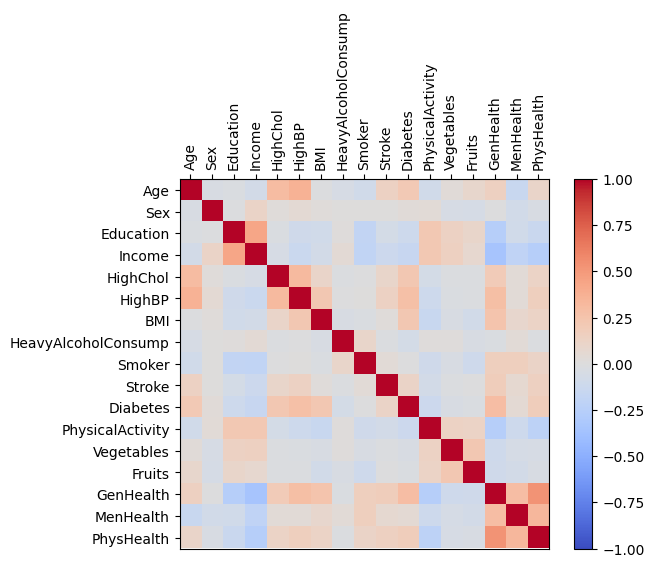

In [7]:
corr = data.corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
labels = data.columns
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.xticks(range(len(corr)), labels, rotation=90)
plt.yticks(range(len(corr)), labels)
plt.show()